In [13]:
# tmp
# n = 1: 0
# n = 2: 1
# n = 3: 2        231, 312
# n = 4: 9        2341, ...

oref = []
for i in range(20): oref.append(i)
    
def filler(a, m):
    print(m)
    global oref
    n = len(a)
    if m == n: return a
    for d in range(n):
        print(n, m, d, a[m], oref[m], a)
        if not d in a and not d == oref[m]:
            a[m] = d
            return filler(a, m+1)
        print('                      ', n, m, d, a[m], oref[m], a)
        
for n in range(3, 4):
    for i in range(n): # over values for digit 0
        e = 0
        a = [-1]*n
        b = filler(a, 0)
        print(b)
        
    print(n, ':', e)

0
3 0 0 -1 0 [-1, -1, -1]
                       3 0 0 -1 0 [-1, -1, -1]
3 0 1 -1 0 [-1, -1, -1]
1
3 1 0 -1 1 [1, -1, -1]
2
3 2 0 -1 2 [1, 0, -1]
                       3 2 0 -1 2 [1, 0, -1]
3 2 1 -1 2 [1, 0, -1]
                       3 2 1 -1 2 [1, 0, -1]
3 2 2 -1 2 [1, 0, -1]
                       3 2 2 -1 2 [1, 0, -1]
None
0
3 0 0 -1 0 [-1, -1, -1]
                       3 0 0 -1 0 [-1, -1, -1]
3 0 1 -1 0 [-1, -1, -1]
1
3 1 0 -1 1 [1, -1, -1]
2
3 2 0 -1 2 [1, 0, -1]
                       3 2 0 -1 2 [1, 0, -1]
3 2 1 -1 2 [1, 0, -1]
                       3 2 1 -1 2 [1, 0, -1]
3 2 2 -1 2 [1, 0, -1]
                       3 2 2 -1 2 [1, 0, -1]
None
0
3 0 0 -1 0 [-1, -1, -1]
                       3 0 0 -1 0 [-1, -1, -1]
3 0 1 -1 0 [-1, -1, -1]
1
3 1 0 -1 1 [1, -1, -1]
2
3 2 0 -1 2 [1, 0, -1]
                       3 2 0 -1 2 [1, 0, -1]
3 2 1 -1 2 [1, 0, -1]
                       3 2 1 -1 2 [1, 0, -1]
3 2 2 -1 2 [1, 0, -1]
                       3 2 2 -1 2 [1, 0, -1]
None
3 : 0


# Sixes

<div>
<img src="images/probability/sixes_and_fives.jpg" width="600" align="left"/>
</div>
<BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR>

A pair of sixes and a pair of fives. 


# This Notebook


This notebook concerns probability and expectation. If the reader is working
through the challenges and wishes to avoid spoilers: I have tried to flag 
them via a **Look-ahead alert**.
    
    
## A Warm-up problem
    
    
Kid Pipkin is considering colleges and notices that each has an "acceptance rate". For example Cornell seems to accept 11% of the students who apply. 
She wonders, 'If I apply to all the colleges I am interested in, what is the probability I will get into at least one of them?'
    
    
There is a complicated way of calculating this and a much simpler counter-approach. The distinction between the two of them becomes very 
important in what follows below, which is about rolling dice rather than getting into college.
    

It can be helpful to simplify a problem to focus on just a few key ideas. A simpler problem is: What is the probability of getting
accepted to at least one of $n$ colleges if each has an acceptance rate of 10%? Obviously with $n=1$ the answer is 10%. If $n=2$
the answer is 19%. 
    
    
The general answer is given below with a list of colleges and corresponding acceptance rates as provided by a search engine. 
***Look ahead alert: Don't read further if you would like to work the solution out on your own!***
    

---------------------------------

In [8]:
# Schools that Kid Pipkin is not so interested in:
#     Harvard, Columbia, Georgia Tech, Princeton, UW
#     0.06,    0.067,    0.17,         0.056,     0.559
# 
# Schools that Kid Pipkin would be interested in attending:
#    MIT,  Brown, JHU,   Boston U, Boston College, Northeastern, Cornell, Stanford, Caltech,   UCB,   UCLA,  UCSD, CMU,   CP-SLO]
b = [.073, 0.077, 0.111, 0.14,     0.264,          0.205,        .107,    0.052,    0.067,     0.16,  0.185, .366, .173,  .309] 

a = len(b)
trials = 1000000


# calculate the probability through random trials
from random import random
d = 0
for t in range(trials):
    for c in range(a):
        if random() <= b[c]:
            d += 1
            break

            
# calculate the probability through mathematical solution
not_product = 1.
for i in range(a): not_product *= (1.-b[i])
calc_accept = 1.-not_product


print(a, 'applications:', round(100*d/trials, 3), round(100*calc_accept, 3))

14 applications: 92.499 92.501


## Rolling a single die to motivate the pdf
    
I know about three things in the topic of probability. The first is that a probability is
a number between zero to one inclusive; and is somehow connected to the outcomes of unpredictable 
of ('in the future') events. This is a staple idea in what follows. 


The second thing is the use of averaging to arrive at an expectation. An expectation
is a number that applies to a probability experiment that is is run over and over again
under identical conditions. The idea is to determine how the experiment will come out
on average; 'How we expect the experiment to turn out.' The third thing I know
about is called a moment-generating function... but I've forgotten what that is at the moment. 

    
    
So let's begin with the second idea, the averaging process
to get an expectation, making use of the first idea, the basic concept of 
a probability as a number from zero to one inclusive. 
Let's describe a slow way and a couple of faster ways of calculating an
expectation. 
    

### method 1


The experiment: I have a dice with six faces. I want to know how many times I need 
to roll it, on average, for it to come up 6. I start rolling it until it comes up 
six; and this requires let us suppose five rolls. That is my result; so I write down 
"5". That was experiment 1. I do this experiment a second time; and it requires 
seven rolls to get a six; so I write down "7". I continue until I have done 20,000
such experiments, and 20,000 corresponding numbers, which I will call scores.
From this experimental data I calculate the average. I add up all the scores 
and divide by 20,000. 
    
    
The result will be close to 6. This is sensible, since there are six possible outcomes
of rolling the dice, all equally likely. 
    

### method 2


Now I do the experiment a second time. It will be the same average but by
slightly different means: I draw 
a stack of empty boxes on a piece of paper. I label them 1, 2, 3, 4 and 
so on up to say 100. Now I start a first experiment: I count the number of rolls
needed to get a first 6. Suppose it takes two rolls; so I have a score of 2.
I put a tally mark in
the box labelled '2'. And as before I do this scoring process 20,000 times. 
When I am done
I will have 20,000 tick marks distributed among the various boxes. So I count the
tick marks in each box and write that number next to the box. Now it is time
to get the average. There are, let's suppose, 3419 tick marks in the '1' 
box. I'm summing the scores; so I add ones: 3419 times. In the score = 2 box 
there are 3088 tick marks; so to my running sum I add 2 x 3088. And so on. 
Each box has a score and a tick mark count; and I simply multiply them
and add that to the total. Once again at the end 
I divide by 20,000 to get the average score, or the expectation for how many
rolls it takes to get a 6. 


### method 3


Now to do the experiment one more time. As before I set up 
the tick mark boxes with score labels; I fill these boxes variously 
with 20,000 tick marks, one per experiment. I tally up the tick marks 
in each score box and 
write that tally next to its box. Now the difference: 
I divide each tally by 20,000. This means there will be no division 
by 20,000 as the last step: The averaging is built into these 
tally / 20,000 fractions.


The tick mark tally for each box has become a fraction of the total number 
of 20,000 tick marks. 
These fractions necessarily add to one. Each fraction is an observed 
probability of getting that score when rolling a dice. 
Now, in this third version of the experiment, once the tick mark counts are 
divided by 20,000, the resulting probabilities are multiplied by
their respective scores; 
and these products are added up to arrive at the average.
    

### method equivalence


We have now imagined doing the experiment 3 times. These three calculations are
identical and the procedures vary slightly. The point is to make the case that
they *are* identical while finding a further use for 'method 3' that invoked 
the idea of a set of probabilities associated with each score. The probabilities
act as weights; so method 3 calculates a weighted average. 
    
    
The organized
listing of probabilities by score can be seen as a discrete function. 
'Discrete' means it has
values at integral scores: 1, 2, 3, 4 and so on. There is no value of
this function for 3.2: We have no way of rolling a dice 3.2 times. 
    
    
This discrete function is called a probability distribution function, 
abbreviated **pdf**. It serves
two purposes. First it works in the above story to illustrate a way
of calculating expectation: how many rolls on average (6) are required
to get a dice to turn up 6 (or 5 or 4 or ...)



The second purpose of the probability distribution function is to enable 
using theoretical probabilities to determine expectations. That is, 
if we do not want to actually conduct 20,000 experiments (which are rather
time consuming) we can instead calculate probabilities for various outcomes,
multiply those probabilities by the outcome scores, and add the results
to arrive at the expectation. An expectation that hopefully agrees with
experiment. 
    

2.7186188


    
    
## The game


The central question comes in the form of a game; and eventually we arrive at an answer.
It takes some doing; so the interested reader is invited to treat this as a journey!



The game: Begin with a handful of (six-sided) dice and roll them all at once. Remove
those dice that come up 6. Repeat the process with the remaining dice. The object is
to remove all the dice in as few rolls as possible. Truly this is a game of skill...


The question is: If we were to play this game many times with $N$ dice, how many rolls 
do we expect the game requires to finish, on average?


Unless otherwise noted, the word *dice* in this notebook refers to one or more 
cubes with faces marked sequentially one through six. Technically one cube is a *die* not a *dice*
but the two words are used interchangeably. I do try to stick to 'dice'. When a single dice 
or several dice are rolled: their upper faces are the results; random numbers evenly 
distributed from one to six: All dice are fair, each face has a one in six probability. 


I also may use a phrase like 'three dice add to 12'. This implicitly means rolling three dice
and summing the results.
    
    
Also throwing dice and rolling dice are the same thing. 


Also, an exception to dice being cubes: I use 
an eight-sided or octahedral dice in one example below. 



## Probability Ideas


Just like on any journey we'll stock up on some supplies -- ideas -- before setting out. There are
about half a dozen ideas that will prove useful. And for the record I sometimes make up my own
terminology... so be ready to learn better terminology elsewhere!


### Idea Zero: Probability as a number


Probabilities are traditionally numbers from $0$ to $1$ inclusive. This applies to some sort of event or 
experiment that has an observable outcome. If I roll a die (the experiment) I will arrive at an outcome
like "I rolled a 3". Let's agree to designate a probability as $p$. In the event
that $p \; = \; 1$ we can say that whatever is the corresponding outcome is a *sure thing*. If $p \; = \; 0$
then that outcome has *no chance*.


### Idea One: Complementary probability and negation $\neg$


If the probability of an outcome $A$ is $p$ then we can call that $p(A)$. 
The probability of outcome A *not* happening is $1-p(A)$. The 'negation' symbol
$\neg$ is used as shorthand, so we have $p( \neg A ) \; = \; 1 \; - \; p(A)$.

### Implications of Ideas 0 and 1


A calculated probability that is less than $0$ or greater than $1$ is an error. One could experiment 
with stretching the definition of a probability but for this discussion: That's the rule.


A probability $p$ for some outcome means that -- were one to perform the experiment $n$ times -- 
one would expect $p \cdot n$ such outcomes. This perspective concerns the *frequency* of the outcome.
People who talk about probability in this way are called
*frequentists*. This is the traditional approach to getting started with probability.


### Idea 2: Products of Independent Probabilities: 'AND'


The ideas of 'independent' versus 'dependent' events are confusing in probability theory (to me), 
in comparison with how they are used commonly. Let's look at two independent events for a moment.
I'll use the intersection symbol $\cap$ to represent **and**. For **or** I will use
the union symbol $\cup$.


Let's suppose I am sitting at home considering future actions $C$ and $S$: 


- C: I hang the clothes on the clothes-line.
- S: I go into the garage and sweep up the sawdust.


I decide to use the roll of an 8-sided dice (an octahedron) to determine if I do $C$:
If I roll $1$ or a $2$ I will hang up the clothes.
Similarly I will use the roll of a 6-sided dice to determine if I do $S$:
A $1$ or a $2$ means I will sweep up sawdust.
These events are independent. There are several possible outcomes and associated
probabilities of my dice rolling:


- C happens (never mind whether S happens) $P(C) \; = \; 1/4$.
- S happens (never mind whether C happens) $P(S) \; = \; 1/3$.
- Both C AND S happen $P(C \; \cap \; S) \; = \; P(C) \cdot P(S) \; = \; 1/12$.
- Either C happens OR S happens OR both happen $P(C \cap S) = 1/2$.


**Proof by thought experiment** I follow this procedure 144 days in a row
where the dice rolls behave 'perfectly'. On 36 days: $C$ happens. On 
48 days $S$ happens. These are just reassertion of the first two outcomes above. 


However the
$S$ days are distributed properly across both the 36 $C$ and the 108 $\neg C$ days.
There is no favoritism as $C$ and $S$ are independent.
So of the 36 $C$ days, 12 of them are also $S$ days. For the 108 $\neg C$ days, 
36 are $S$ days.


The 12 $P(C \cap S)$ days are 1/12th of the full 144 trial days. 


For $C \cap S$: All 36 $C$ days (12 of which are also $S$ days) plus
36 additional $S$ days ($\neg C$) count to the total: 72 days, 
half the total days.


The important detail was not to double count the 
days when both $C$ and $S$ happen. Noting that $1/3 + 1/4 = 7/12$
we cannot simply add the two probabilities for $C$ and $S$. 
This is sensible since their respective 
probabilities could be 8/10 and 9/10; and now adding these we would 
get a probability of 1.7.


$C$ and $S$ are independent of one another; 
and this means they are *not* giving us mutually exclusive outcomes
in the way that $C$ and $\neg C$ do. 



### Idea 3: Sum of Probabilities for Mutually Exclusive Paths: 'OR'


Consider an outcome that can be arrived at by more than one pathway. 
The probability of this outcome is the sum 
of the probabilities of the individual paths. This is a notion of 'counting the ways' that an outcome
can happen. It is associated with the word **or**. 


A probability addition for multiple paths works *when those outcomes are mutually exclusive of one another*. That is, 
only one of { *outcome A*, *outcome B*, *outcome C* } can happen at a time.


What is the probability of three dice adding to 16? To keep the outcomes distinct we first paint
the three dice blue, red and yellow. The probabilities for each way are:


* 5 + 5 + 6 with probability $(1/6)^3$ (Only one way: Blue = 5, Red = 5, Yellow = 6)
* 5 + 6 + 5 with probability $(1/6)^3$ (Blue = 5, Red = 6, Yellow = 5)
* 6 + 5 + 5 with probability $(1/6)^3$ ...
* 6 + 6 + 4 with probability $(1/6)^3$ ... and so on ...
* 6 + 4 + 6 with probability $(1/6)^3$ ... for all possible ways ...
* 4 + 6 + 6 with probability $(1/6)^3$ ...


Sum of probabilities = P(3 dice sum to 16) = 1/36.


This is the **or** idea for addition of probabilities.

### Idea 4: Discrete versus Continuous Probability


Discrete probability: There are a finite number of possible outcomes
that have associated non-zero probabilities. 
Roll five dice: The probability of rolling all 6's is one (way) 
divided by $6^5$ total outcomes. 


Continuous probability: Like the name implies there is some sort of 
continuum of possible outcomes. Probabilities are non-zero only 
when considered over a range of these outcomes. 
We integrate a probability curve over the range to determine
the probability of an outcome within that range. 

## The journey begins


We have five ideas up above, more than enough to start solving problems in probability.
The narrative for this first problem illustrates how easy it can be to go astray.



### A (discrete) problem


Suppose we roll $N$ dice. What is the probability that the result includes 
at least two sixes? I will use a subscript on $P$ for *Probability* to 
indicate how many dice $N$ we use.


$P_1(2+\;sixes) = 0$<BR>
$P_2(2+\;sixes) = 1/36$<BR>
    

That is, the probability of rolling 2 sixes with one dice is zero, and there
is but one possibility for rolling two dice and getting two sixes out of 36
total possibilities.
    
    
My first idea is to consider all possible pairs of dice and ask what is 
the probability that they are both six. Then add up these equivalent probabilities
as they are mutually exclusive. This is equivalent to multiplying the "2 sixes
on 2 dice" probability by the number 
of pairs of dice that can be selected from $N$ dice.


#### An aside on counting subsets

In combinatorics, counting subsets of size $a$ from a set of $N$ distinct elements
is called an [**a-combination**](https://en.wikipedia.org/wiki/Combination).
Informally, the number of possible *a*-element subsets of a set of *N* distinct things 
is referred to as 'N-choose-a'. 
    
    
In the case of this 2 sixes problem: We are noting two
dice from a set of $N$ so we have '$N$-choose-2'. This number (a binomial coefficient) 
is written $\binom{N}{2}$. It is calculated as
$\binom{N}{2}\; = \; \frac{N\; \cdot \; (N-1)}{2}$.
    
    
#### Look-ahead alert
    
    
***If you are interested in working through this problem on your own: Now is the time to 
stop reading here and go try that out.***

#### First try at calculating the probability


Among $N$ dice: For every pair of dice there is a $1/36$ probability both are six. 


Below we have a Python program that rolls $N$ dice many times, keeping track of 
how often there are two or more sixes. This is an experimental
approach. It depends on the reliability of the Python *random* library. 


In addition to the experimental result, let's also calculate the result
based on the above idea. If we have three dice then there are three subsets
of two. Let's paint them red, green and blue so they are distinct. Then
we can have { red and green both six } OR { red and blue both six } OR 
{blue and green both six }. Since alternative paths to a result means adding 
probablities we have a sum of three $1/36$ probabilities. So the answer
should be $1/12$. 


In general terms: For $N$ dice this first idea will give us



$P_N(2+ \; 6s) = \binom{N}{2} \cdot \frac{1}{36} = \frac{N\;(N-1)}{2}\; \cdot \; \frac{1}{36}$


Let's check this experimentally by rolling $N=3$ dice one million times.

In [22]:
from random import randint

def run_experiment(Trials, N):
    '''
    roll N dice Trials times and return the ratio of success/Trials
    '''
    nTwoSixes = 0
    for i in range(Trials):
        nSixes = 0
        for j in range(N):
            if randint(1, 6) == 6: nSixes += 1
            if nSixes > 1:
                nTwoSixes += 1
                break
    return nTwoSixes/Trials


def calculation_version_1(N):
    '''
    Multiply probability 1/36 by N-choose-2 pairs of dice among N dice
    '''
    return (1/36) * (N*(N-1))/2    # For three dice this is 1/36 * 3-choose-2

def diagnostics(e, c, N):
    '''
    Compare the experimental result to the calculation. A ratio close to one indicates
    that the calculation and the experiment are in agreement. This function makes use
    of int(pow(6, N)) to indicate the number of possible rolls of N dice.
    '''
    e_over_c = e / c
    possible = int(pow(6, N))
    print("Calculation:", round(c, 5), "Experiment:", round(e, 5), "Ratio:", round(e_over_c, 4))
    print("Experiment fraction: ", round(e*possible, 2), '/', possible)
    print("Calculation fraction: ", round(c*possible, 0), '/', possible)

nTrials   = 1000000
nDice     = 3

experiment  = run_experiment(nTrials, nDice)
calculation = calculation_version_1(nDice)

diagnostics(experiment, calculation, nDice)

Calculation: 0.08333 Experiment: 0.0742 Ratio: 0.8904
Experiment fraction:  16.03 / 216
Calculation fraction:  18.0 / 216


Alas, something has gone wrong. The experiment says the odds are 16 in 216; but the calculation says
18 in 216. For one million trials that is a big difference. 
Let's assume the experiment is correct (no bugs in the code). 
Then it must be the calculation that is astray. 


#### Look Ahead Alert 


***If you are working through this problem: Now would be an excellent time to 
sit back and consider what the mistake could be.***

Up above for **idea 3** we use addition of probabilities for mutually exclusive "**OR**" paths
that reach the same result. The problem here is that our paths are not mutually exclusive. 
This diagram shows the rolls on the three dice; and one possible result where all three dice
come up six is over-counted. This is the case where all three dice come up six.
This 'success roll' will be part of the { red, blue } possibility, the { red, green } 
possibility and the { green, blue } possibility.

<BR>
<div>
<img src="images/probability/two_sixes.png" width="500" align="left"/>
</div>
<BR>
<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
    
If we over-count probabilities that means we
have added up too much probability: We err on the high side. The correct answer for three dice
ought to be $16/216$, not $18/216$. 



#### Second try at a calculated probability


The above calculation works perfectly for two dice because there is no way to over-count. 
For three dice, however, it is not accurate and for $N > 3$ it gets worse. (You can
change the parameter `nDice` and re-run the code to see this.) 
The calculated probability is always bigger than the experimental probability. 


#### Look Ahead Alert 


***If you are working through this problem: Now is the time to stop reading.***

#### Rationale for the second calculation


I decided to try thinking about this problem using $N=4$ dice. This has 
a little more built-in detail. 
The total number of possible rolls (now the dice are red, green, blue and yellow) 
is $6^4 = 1296$. 


I represented 1296 outcomes by drawing a six-by-six grid of squares. Each 
square was itself a six-by-six array. This helps with staring at over-counting patterns. 


After some staring I thought to make a branching tree diagram for the process of rolling four
dice. To generalize it I assigned probability $\alpha$ for rolling a six on a dice
and probability $\beta = 1 - \alpha$ for $\neg 6$. This pleasantly abstracts
away the arithmetic. Here is what the tree looks like: 


<BR>
<div>
<img src="images/probability/two_sixes_tree.png" width="400" align="left"/>
</div>
<BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR>

At the far left nothing has happened. The first branch is for rolling the red dice.
The second branching is for rolling the green dice; then blue; then yellow. Each 
branch splits by probability $\alpha$ or $\beta$ i.e. a six was rolled / a six was 
not rolled for that dice. In this scheme of $6s$ and $\neg 6s$ there
are $2^4 = 16$ possible outcomes. 


Since any path to an outcome
is a set of independent outcomes (**AND**), the probability of that path 
is the product of the branch probabilities $\alpha$ or $\beta$. 
These are summarized on the right as powers of $\alpha$ 
and $\beta$. When an outcome has at least $\alpha^2$ that means it has at least two
sixes so it counts towards the total probability of rolling two sixes with four dice.
Those outcomes have check marks in the diagram above.


The total number of outcomes with check marks is eleven (of sixteen). Categorizing 
these 11 results in terms of powers of $\alpha$ there is one with $\alpha^4$, 
4 with $\alpha^3$ and 6 with $\alpha^2$. Of course 1, 4 and 6 are three of the five
binomial coefficients for ${(x + y)}^4$. 

    
<BR>
<div>
<img src="images/probability/two_sixes_correct.png" width="500" align="left"/>
</div>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR>

   
    
Recognizing this, the new calculation for $P_N$ comes
into focus. The tree view shown above does not over-count successful outcomes
because now those sixteen outcomes really are mutually exclusive. We have all 
the cases accounted for where two dice come up 6, where three dice come up 6, and 
where four dice come up 6. Furthermore the probability of each outcome is
just as described above, the product of the constitutive probabilities for $6$ or
$\neg 6$. This gives us a sum of products like so: 


$$P_{N}(2+\;sixes) = \sum_{i=2}^{N}\binom{N}{i}\cdot{\alpha^i}\cdot{\beta^{N-i}}$$


The code below adds and uses a combination function called **`a_choose_b(a, b)`**. 

In [24]:
def a_choose_b(a, b):
    '''The combination function "a-choose-b". WARNING this function does not check
    the arguments a and b to ensure they are in the proper range. Use at your own risk!
    '''
    if a == 0 or a == 1: return 1.
    if b == 0 or b == a: return 1.
    if b == 1 or b == a - 1: return float(a)
    numerator, denominator = 1, 1
    for j in range(a - b + 1, a + 1): numerator *= j
    for j in range(2, b + 1):         denominator *= j
    return numerator / denominator


def calculation_version_2(N, alpha):
    '''
    Uses a refined OR method of counting ways that should not over-count
    '''
    beta = 1 - alpha                     # Probability a single dice does *not* roll a six
    return sum([a_choose_b(N, i)*pow(alpha, i)*pow(beta, N - i) for i in range(2, N+1)])


alpha     = 1/6                  # Probability(single dice rolls a 6)           
nTrials   = 1000000
nDice     = 4

experiment  = run_experiment(nTrials, nDice)
calculation = calculation_version_2(nDice, alpha)

diagnostics(experiment, calculation, nDice)

Calculation: 0.13194 Experiment: 0.13191 Ratio: 0.9997
Experiment fraction:  170.95 / 1296
Calculation fraction:  171.0 / 1296


### Lessons


* Over-counting or under-counting possibilities is a pitfall in calculating probabilities
* Drawing diagrams (and staring at them) can be useful 
* Painting randomizers unique colors helps illustrate how different results can be sorted and combined
* The **AND** and the **OR** rules can be applied together
* Paths that appear to be mutually exclusive may not be


### Idea 5: PDFs, CDFs, and Expectation


A ***PDF*** or Probability Distribution Function describes the probability of each possible outcome 
of an experiment. It applies to discrete situations; and it has a continuous-probability analog 
called a Probability Density Function (also a PDF). 



If probabilities in a PDF are ordered in some way they can be summed in a cumulative manner
to give "the total probability to this point". This is the Cumulative Distribution Function
or ***CDF***. One of the most useful aspects of a CDF is that upon summing over all possible
outcomes it should reach a value of $1$. 


There is a type of experiment I would like to introduce now that involves the repetition of 
random trials. As an example: How many times do we expect to throw a single dice for it to 
come up 3? We might roll the dice and get a 6, then a 5, then another 6, then a 3; so the 
outcome of this repetition process was 4 throws. Another experiment might only require 2 
throws, another might take 15, and so forth.


Let's ask what the PDF looks like in this case. The outcome space is the space of positive
integers. Why? Because there is some probability of finishing on the first throw. There is
some probability of finishing on the second throw. This is less than the probability of 
finishing on the first throw because sometimes a second throw will be unnecessary: We threw
a 3 on the first throw. There is some probability of finishing on the third throw. And
so forth. One could conceivably require 932 throws to get that first 3.


The PDF for this experiment is consequently: The probability of throwing
the very first 3 precisely on throw $i$ where $i$ ranges from $0$ to $\infty$. 
The possible outcomes are countable (if infinite) so this is still discrete
probability.  


PDFs can represent idealized perfect experiments; or they can be produced observationally
by running actual experiments. As an obvious example the PDF for a single die roll with
six possible outcomes is $\{ 1: 1/6, \; 2: 1/6, \; 3: 1/6, \; 4: 1/6, \;5: 1/6, \;6: 1/6 \; \} $ 
all equal and with the full CDF equal to one. In an experiment we expect variability.


#### Motivating the pdf


A probability experiment can suggest questions about the outcome. Above 
we had two such questions:  'What is the probability, on rolling $N$ dice,
that at least two come up $6$?' and 'How many rolls of a single dice do we 
expect are needed on average to get a 3?' The term *expectation* is used
for many types of 'expected outcome' questions. This is an open 
door from probability into
statistics.


A good PDF is instrumental to calculating an expected outcome 
(or *expectation*). Why is this so?  First I'll give a simple 
definition of expected outcome; and then let's do a constructive
excercise to motivate the value of the pdf. 


Expectation $E$ is a weighted sum over outcomes of the quantity of interest: 


$$E = \sum_i Quantity(i) \cdot PDF(i)$$


#### PDF value part one: A tedious experiment.


Let's *calculate* an expectation value for an experiment. We run the experiment 
many times to determine the average outcome. Let's continue with this question:
How many times should we expect to roll a single die for it to come up three? 


- We play the game once and it requires 7 rolls. 
- We play a second time and it requires 2 rolls. 
- The third time: 84 rolls, a string of bad luck. 
- And so on. 


After each experiment we write the number of rolls it took. We do this experiment 20,000 times. 
Our results look like $\;7, 2, 84, 19, 3, 1, 5, 8, 2, 1, 14, ... , 17\;$. There are 20,000 such results.



To find the average: Add up all 20,000 results and divide by 20,000.



#### PDF value part two: tick boxes


Before we begin rolling our dice, we create a tally sheet of empty numbered boxes. 
Beside the tally boxes are numbers 1, 2, 3, 4, and so on up to say 100.
These numbers represent how many rolls are required to finish a given experiment. 
We do the same experiment 20,000 times but now after each one we make a tally
mark in the appropriate tick box. When an experiment requires 14 rolls to
get a six we put a tally mark in box 14. (We can add more boxes if we have 
really poor luck getting that 3.)


Now with 20,000 trials the averaging process is simpler. Suppose tick box "1" has 3,419 
tick marks. Rather than adding up "1" 3,419 times (as we did in Step One) we just multiply 1 x 3,419 to 
get 3,419. If box "2" has 2,977 marks we add (2977 * 2) to our total. And so on for tick boxes 3, 4, 
etcetera. If tick box 7 has 219 marks: Add 7 * 219 to the total. The tick boxes make the sum easier. 
At the end: Suppose the grand total is 121,432. Just as before divide by 20,000 to get the 
expectation, the expected number of rolls required to get a 3.


Imagine we are looking at the 100 tally boxes. The first box will have the most ticks, the second box 
fewer, the third box fewer still, and so on. The early boxes shadow the later ones. The result looks 
like a long tail getting smaller as the tick box numbers get larger.


This sequence of numbers is a probability distribution: It is more likely to take three rolls to get 3
than it is to need 41 rolls. One thing distinguishes this numerical sequence from a PDF, however: 
If the values in the tally boxes are numbers like 3,419 and 2,753 and so on, they do not add up to one. 
That is, they are relative probabilities, not absolute probabilities in the "zero to one" range. 
We can fix that next. 


#### PDF value three: normalizing the probabilities


A third time we set out to do this experiment. As before we set up tick boxes. As before we run
20,000 experiments. Now before summing up tally marks x box number: Divide each of the tally mark
numbers by 20,000. Since there are 20,000 tally marks in total, this gives us 20,000 fractions that 
sum to 1. This is a probability distribution function, a sequence of 100 numbers between 0 
and 1 representing experimental probabilities for rolling a 3 after so many rolls. 


The expectation is now the sum of (probability for tick box i) x (i). There is no division by 20,000
step as we did that above.



$$\;E = \sum_i i \cdot \frac{tally \; score(tick \; box \; i)}{20,000} = \sum_i i \cdot PDF(i)$$



In the case that we can come up with an accurate pdf just by *thinking*: We do not need to
do the 20,000 experiments. We can just calculate the sum. Of course it is nice to run the 
experiment *also* to get confirmation that everything is working out. 

## The Sixes Dice Game


Ever play the board game **Risk**? Or **Yahtsee**? In many games like these it is helpful to roll lots of sixes. 
So I invented a game to practice rolling sixes. 
I gathered up a large pile of dice and rolled them all at once. Any that came up 6 were 'good' so I set them 
aside. Then I rolled the remaining dice and again set aside the ones that came up 6. I kept going, 
counting how many rolls it took before I had set aside all of the dice. This was my score. 
I repeated the game a few times to try and get a better (lower) score.


Let's call this game ***Sixes***. After awhile I wondered how many throws of the dice it *ought* to take to 
finish the game. From here on I refer to that number as $T$ for 'number of throws'. To emphasize that it
depends on the number of dice one begins with $N$ we can write $T_N$.


***Sixes problem: What is $T_N$?***

### What Sixes is *not*


If we begin with $N$ dice and roll all of them in a group and count the sixes, and then roll all of them 
again in a group, and add in how many sixes this time, and so on: We will not be playing the game described 
above. The reason for this I leave to you to figure out.

### A first attempt


A useful tool will be (as above) writing code to play Sixes many times 
for many values of $N$ to arrive at $T_{N, \; exper}$ by which 
we mean an experimental average.


Now when I began working on this problem
I came up with a solution for a large number of dice, like $N \; = \; 40$
by making up a hokey rule.  I decided my dice behaved like perfect
fractional dice. If I start with 40 dice, $1/6$ of them or $6\frac{2}{3}$ dice 
will come up 6, leaving $33\frac{1}{3}$ for round 2. This might sorta work for very large
numbers of dice but it leads to problems when the number of dice dwindles.


In order to turn this into a calculation I had to add in two more goofy ideas. 
First I will allow a fractional roll of the dice. I don't even know what that means.
But this will give me $T_{goofy}$. Second I will actually calculate how many rolls 
are needed to have precisely one dice still remaining. Since I know it will take on 
average six rolls to get a six I will take my answer as $T_{goofy} + 6$. 


Anyway let's take a moment to write the experiment code. I'll include $T_{goofy} + 6$
comparison.

N =  98




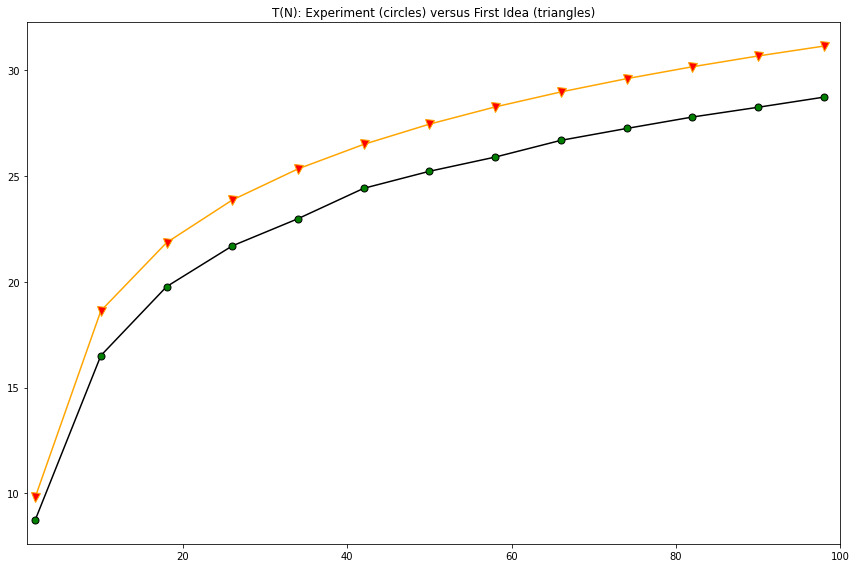

In [44]:
from matplotlib import pyplot as plt
from random import randint
from math import log
from IPython.display import clear_output

def experiment_run(nDice0, nDice1, nDiceSkip, nTrials):
    x, n = [], []
    for N in range(nDice0, nDice1 + 1, nDiceSkip):
        n.append(N)
        nThrowsSum = 0
        for T in range(nTrials):
            nRemaining = N
            nThrows = 0
            while nRemaining:
                nThrows += 1
                for k in range(nRemaining):
                    if randint(1, 6) == 6: nRemaining -= 1
            nThrowsSum += nThrows
        x.append(nThrowsSum / nTrials)
        clear_output(wait = True)
        print("N = ", N)
    return x, n

def calculate_idea_1(nDice0, nDice1, nDiceSkip):
    return [6 + log(1/N)/log(5/6) for N in range(nDice0, nDice1 + 1, nDiceSkip)]

def compare_plot(n, x, c, nDice1):
    fig, axs = plt.subplots(figsize=(12,8), tight_layout=True)
    axs.plot(n, x, marker='.', ms=14., color='k', mfc='g')
    axs.plot(n, c, marker='v', ms=9., color='orange', mfc='r')
    axs.set(xlim = (1, nDice1))
    axs.set(title='T(N): Experiment (circles) versus First Idea (triangles)')

nTrials = 5000
nDice0 = 2
nDice1 = 100
nDiceSkip = 8

x, n = experiment_run(nDice0, nDice1, nDiceSkip, nTrials)
c    = calculate_idea_1(nDice0, nDice1 + 1, nDiceSkip)

compare_plot(n, x, c, nDice1)   

#### First idea derivation


Let's suppose we begin with $N$ fractional dice. Each roll removes $1/6$ of the dice 
so that $5/6$ remain. For example the remainder of $N$ dice after five rolls is
$5/6\cdot 5/6\cdot 5/6\cdot 5/6\cdot 5/6 \cdot N = (5/6)^5 \cdot N$. If I set this 
remainder to 1 dice and permit the exponent to be real: 


$$\frac{5}{6}^r \cdot N = 1$$


$$r = \frac{\log{1/N}}{\log{5/6}}$$


Once I have a single dice remaining: It will take six rolls on average for it to come up six.


$$T = r + 6$$


#### First idea result


The first idea is actually not that bad. The curve has the right shape and does not seem to be
diverging from the experimental values. The calculation is consistently above the experimental 
value of course, corresponding to an underestimation of how quickly the dice will be set aside.
Anyway this is certainly not a precisely correct answer.

#### Second idea


Perhaps a 1/2 dice evaporates in a puff of probability smoke? That would eliminate this rather 
artificial "add 6 as the last step" business. Ok; in this case we have:


$$(5/6)^t \cdot N = 1/2$$


$$t = \ln \; (2N) / \ln \; (6/5)$$




N =  1002



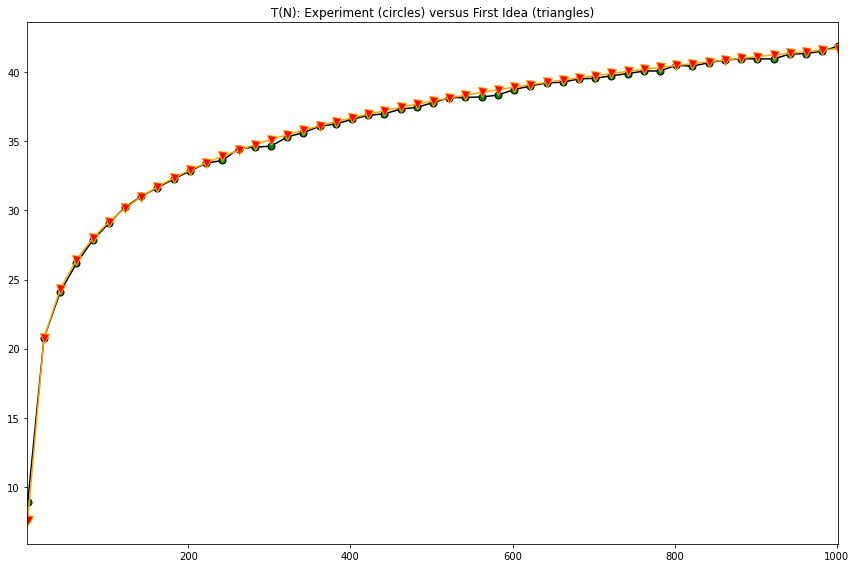

In [50]:
def calculate_idea_2(nDice0, nDice1, nDiceSkip):
    return [log(2*N)/log(6/5) for N in range(nDice0, nDice1 + 1, nDiceSkip)]

nTrials = 4000
nDice0 = 2
nDice1 = 1002
nDiceSkip = 20

x, n = experiment_run(nDice0, nDice1, nDiceSkip, nTrials)
c    = calculate_idea_2(nDice0, nDice1 + 1, nDiceSkip)

compare_plot(n, x, c, nDice1)  

#### Second idea result 


This seems to work quite well for $N \ge 20$, though still a bit on the high side.
But not so well for small values of $N$.
So much for wishfully collapsing the wave function for fractional dice.


From here let's proceed more methodically towards a proper solution.

### What is $T_1$?


This is simpler, just using a single dice, and this question was raised earlier: 
What is the expectation of the number of throws to get a 6 (or a 3 or whatever)?
This has to be easier than calculating $T_N$.


As a first step let's build the PDF and show that $\sum^{\infty}_{t=1}pdf_1(t) = 1$.



Clearly we can start at throw $1$ and say $pdf_1(1) = 1/6$. The complementary probability is
$P(\neg 6) = 5/6$. This gives us the key to $pdf_1(2)$ via **AND** reasoning: The probability
of rolling a six on the second throw means we throw a six (1/6 chance) **AND** we did not throw
a six on roll 1 (5/6 chance). So $pdf_1(2)=1/6\cdot5/6=5/36$.


The same logic applies to throws 3, 4, 5 and so on: $pdf_1(throw\;t) = (5/6)^{t-1} \cdot 1/6$.


Here we are back to using integer numbers of dice; no more fractional dice.

#### Is the CDF for this PDF equal to one?


In what follow, a reminder that the ***1*** subscript refers to playing the Sixes game with just one dice. 


Does $cdf_1(t \rightarrow \infty) = 1$? It had better!  


$cdf_1(t \rightarrow \infty) = \lim_{\tau \rightarrow \infty} \sum_{t = 1}^{\tau} \; \left( \frac{1}{6} \right) \cdot {\left( \frac{5}{6} \right)}^{t-1}$



This can be evaluated using a very pretty idea that I found in Apostol's Calculus Volume 1: 
For $0 \; < a \; < 1$ the series 


$S = 1 + a + a^2 + a^3 + a^4 + ... + a^t$


can be multiplied by $-a$ to produce a new series 


$$T = -a - a^2 - a^3 - a^4 - a^5 - ... - a^t - a^{t+1}$$


and when $S$ and $T$ are added together only the first and last terms remain:


$$S + T = 1 - a^{t+1}$$


The rest of the terms 'telescope' away to nothing. Writing $T$ as $-aS$: 


$$S \cdot (1 - a) = 1 - a^{t+1}$$


or


$$S = \frac{1 - a^{t+1}}{1 - a}$$

As a result the cumulative distribution function sum above becomes


$$cdf_1(t \rightarrow \infty) = \left( \frac{1}{6} \right) \lim_{\tau \rightarrow \infty} \frac{1 - (5/6)^{\tau+1}}{1 - (5/6)} = \left( \frac{1}{6} \right) \cdot 6 = 1$$


This cdf shows that $pdf_1(t)$ behaves properly; so we can be hopeful we are on the right track.


#### What is the expectation $T_1$?

We can next calculate the expectation value for the single die version of the Sixes game: 


$$T_1 = \sum_{t=1}^\infty t \cdot pdf_1(t).$$


Let's take the limit $n \rightarrow \infty$ for a finite sum of $n$ terms. To make notation easier I'll use $\alpha$ 
and $\beta$ for the two probabilities $1/6$ and $5/6$. The strategy here is similar to the telescoping series 
idea above. The variable $i$ ranges over the number of throws needed to roll a six.


$$T_1 = \lim_{n \rightarrow \infty} \sum_{i=1}^{n} i \cdot \frac{1}{6} \cdot \frac{5}{6}^{i-1} = \lim_{n \rightarrow \infty} \alpha \sum_{i=1}^{n}i\cdot \beta^{i-1}$$


$$b \cdot T_1 = \lim_{n \rightarrow \infty} \alpha \sum_{i=1}^{n}i \cdot \beta^{i}$$


$$T_1 \cdot (1-\beta) = \lim_{n \rightarrow \infty} \alpha \sum i \cdot \left( \beta^{i-1}-\beta^{i} \right) = \alpha \cdot \left( 1 - \beta + 2\beta - 2\beta^2 + 3\beta^2 - 3\beta^3 + ... + (n-1)\beta^{n-2} - (n-1)\beta^{n-1} + n\beta^{n-1} - n\beta^n \right)$$


$$T_1 \cdot \alpha = \lim_{n \rightarrow \infty} \alpha \left( 1 + \beta + \beta^2 + ... +\beta^{n-1}\right) - \alpha n \beta^n = \lim_{n \rightarrow \infty} \left( \sum_{i=1}^{n} 
\alpha \cdot \beta^{i-1}  - \alpha \cdot n \cdot \beta^{n}\right)$$


In the rightmost limit here: The left term is the cdf sum from above, equal to 1 
in the limit $n \rightarrow \infty$.
Showing the term on the right is zero in that limit is left as an exercise. Now replacing the
probabilities for $\alpha$ and $\beta$ we simply have 

$$T_1 \cdot \frac{1}{6} = 1$$


$$T_1 = 6$$

Good news! Because I will get the same result for rolling $5$, $4$, $3$, $2$, and $1$. After six throws I've covered all equivalent possibilities with no favorites.


So that is $T_1$. It remains to do the final jump to a pdf for $N$ dice and I'll have a solution for $T_N$.

#### What is $T_N$?

Going from $T_1$ to $T_N$ is not trivial but it's not too horrible either. Just as for $T_1$ we work out an appropriate PDF for finishing the game on throw $t$ as a function of $N$.  Then we can verify that this PDF sums to 1 and then try and calculate $T_N$.  In this more general case the result may not be quite so pretty... we shall see. 


In the double sum that follows note that the index $t$ runs from 1 to $\infty$ being the number of throws needed to finish the game, and the index $i$ runs from $1$ to $N$, the number of dice we play the game with. Since the pdf is a function of throw number (what is the probability of finishing the game on throw $t$) it is written as $pdf_N(t)$ for a game of Sixes that begins with $N$ dice. 


I first describe the form of the PDF: Suppose that the game is to end on throw $t$. Then there are between one and $N$ dice remaining after $t-1$ throws, i.e. $N$ cases to consider. For each case there is a certain probability of the game ending on throw $t$.  

kilroy From [[Dice supporting probability ideas#Idea 3|Idea 3]] 

the PDF for throw $t$ must therefore be a sum from $1$ to $N$ of the odds of rolling one $6$, two $6$'s, three $6$'s, ..., $N$ $6$'s, all weighted by the probability of having respectively those many dice remaining after $t-1$ throws. This is a sum over the number of ways to finish the game on throw $t$. In other words the PDF is the sum of $N$ individual probabilities of finishing on throw $t$ that account for all the ways of ''not'' having finished the game after the previous $t-1$ throws.  


Rather than bulldoze ahead to a form for the PDF I would like to proceed a little bit more retrograde as it makes the writing easier to do. So I will claim that the PDF can conveniently be written as a sum (over $N$ dice) of the product of four functions, to be elaborated in a bit: $pdf_N(t) = \sum_{i=1}^N F_1(i) \cdot F_2(i) \cdot F_3(i, t) \cdot F_4(i, t)$


so that (assuming it to be a valid PDF) the solution for $T_N$ will introduce a second sum over an infinite number of throws, to look like this: 


$$T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N t \cdot F_1 \cdot F_2 \cdot F_3 \cdot F_4$$


where


$$F_1 = {\left( \frac{1}{6} \right)}^i$$         


$$F_2 = \binom{N}{i}$$


$$F_3 = { \left( \frac{5}{6}^{t-1} \right) }^i$$


$$F_4 = { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}$$


So here we get to go through the justification. $F_1$ is the probability of rolling $i$ sixes on throw $t$. $F_2$ is the number of ways of choosing those $i$ dice from among $N$. Hence the remaining two functions multiplied together had better give the probability of winding up with $i$ dice after $t-1$ throws.


In fact if we assume that exactly $i$ dice have survived to throw $t$ (and we've already accounted for the number of ways of selecting them) the last two factors $F_3$ and $F_4$ are respectively the probabilities that the $i$ dice never came up $6$ and the remaining $N - i$ dice each came up $6$ at least once in $t-1$ throws. So in words the probability of finishing the game precisely on throw $t$ is the sum of $N$ ways of winning on throw $t$, where the index $i$ in this sum is the number of dice that have survived to throw $t$ without ever coming up six, and where to win on throw $t$ they must all come up six on that throw. In order to reach these $i$ dice remaining, first they must never have come up six in $t-1$ throws, and the remaining $N - i$ dice must all have come up six at least once in $t - 1$ throws. 


More justification for these last two terms in the PDF is given as kilroy Dice supporting probability ideas#Idea 6|Idea 6. The solution to the problem therefore is explicitly:


$$T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N t \cdot {\left( \frac{1}{6} \right)}^i \cdot \binom{N}{i}
\cdot { \left( \frac{5}{6}^{t-1} \right) }^i \cdot { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}.$$


or


$$
T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N \frac{t}{6^{it}} \cdot \binom{N}{i} \cdot 5^{it-i} \cdot { \left( \frac{6^{t-1}-5^{t-1}}{6^{t-1}} \right) }^{N-i}
$$


kilroy sixes and fives picture

This answer may have some nicer form but I haven't found it yet. (Some more things to do here are listed below, including that idea.) The computer of course can give a precise "actual number" for $T_N$ by adding up the double sum (with only a finite number of terms for $t$) and so for example if you begin with $19$ dice it should take about ____missing____ throws to win the game on average. 

Incidentally if you'd like to look at another problem along these lines, it is cast (sic) Recruiter Problem|here as the "recruiter problem".


### Loose Ends


* '''Can TN be simplified algebraically? Approximated? I don't know just yet.'''
* '''Does <T> match <Tbad> for large N? T-cheater using N+1?'''
* '''Digressions: BinThm, Fibonacci, Generating functions for <t^n>'''
* '''More messy combinatorics: Derive expected sum of N dice'''
* '''More on Radioactive Decay as a random process with an eye to Zircon'''
* I notice that our dice behave like unstable atoms waiting around to fall apart, where throws are ticks of a clock. Is my initial "wrong" guess more applicable when we consider huge numbers of atoms, i.e. is it a suitable approximation for large N?

## Birthdays and more probability logic


$n$ people arrive at a party and everyone shakes hands with everyone else. As they do so each person 
announces their birthday. What is the probability that at least one pair of persons have the same
birthday? We take a year to be $365$ days long and we take birthdays to be uniformly, randomly
distributed. 


The probability of one pair of people having the same birthday is $1/365$. The sum of probabilities
will be $1/365 + 1/365 + \dots + 1/365 = \binom{n}{2} \cdot \frac{1}{365}$. 
But we know that this number is too large because it over-counts when more than one pair of 
people have the same birthday. So we could do the 'sum of products' approach
above and be done.


But wait! Is this an alternative approach?


Let us do $a$ trials of this party. Label the first two guests $1$ and $2$. 


- 1 and 2 share a birthday on $\frac{a}{365}$ of the $a$ trials.  
    - $a - \frac{a}{365}$ trials remain. 
    - We do not care if other people share birthdays on those first $\frac{a}{365}$ trials: irrelevant
    - Of the remaining trials...
        - $\frac{a-\frac{a}{365}}{365}$ have 1 and 3 sharing a birthday
        - Add this to our cumulative probability of joint birthdays
        - Now $a - \frac{a}{365} - \frac{a - \frac{a}{365}}{365}$ trials remain
           - ...and so on until all $\binom{n}{2}$ possible pairs are exhausted


Principle: When there are many ways of succeeding: Use complementary probability. 
Suppose success is $this \cup this \cup this \cup \dots \cup this$
Check the converse: $\neg this \cap \neg this \cap \neg this \dots \cap \neg this$
allows us to multiply probabilities. And then $P(success) = 1 - P(failure)$.


$$P(n\;people: \;one+\;shared\;birthday)\;=\;1\;-\;P(two\;people:\;no\;shared\;birthday)^{pairs\;of\;people}$$

$$P(shared \; birthday) = 1 - \left( \frac{364}{365} \right)^{\binom{n}{2}}$$

For the matter of "Either C or S or BOTH" occurs we have (36 + 36)/144; so this means at least one of S and C 
happens 1/2 of the time. Notice that P(C) + P(S) = 1/4 + 1/3 = 7/12 which ''overcounts'' because there are 
some days on which both occur. P(C) + P(S) counts those days twice, so we subtract away one of those as 
P(C AND S) to arrive at the correct result of 1/2. 7/12 - 1/12 = 1/2, so 1/12 must be P(C AND S), 
which is P(C) x P(S); so the "AND" implies multiplication of independent probabilities.


This *counting of ways* means that we count the number of possible outcomes, we count the number of desired outcomes, 
and set the probability of the desired outcome as the ratio of desired to possible outcomes. In the process we 
have to take care not to count some outcomes more than once.

Now consider the following two events in the *dependent* case:


* D: I drive from my home to the post office parking lot.
* W: I walk from the parking lot into the post office.


In this case W is dependent on D because I only have the option to walk inside if I first drive to the parking lot. Suppose P(D) is 1/4 and P(W) is 1/3, but we require that W can only happen if D happens. In fact a better way to write this is P(D) = 1/4, P(W | D) = 1/3, and P(W | !D) = 0. This last means there is no way W can happen if "Not-D" happens. If I don't drive to the parking lot I can't possibly then walk inside.

Now we have the same questions to compare with the independent case above: 


* Outcome D (never mind whether W happens) has probability 1/4 just as before.
* Outcome W (only possible if D happens) has probability P(D)*P(W|D) = 1/12. 
* Probability both D and W happen = P(D)*P(W). This will be 1/12 as in the previous line.
* Either D happens or W happens or both happen = P(D) = 1/4.


Again the last line requires some thought. W will happen only if D happens. But if D happens then the result will be true regardless of whether W happens, so W is irrelevant to the total question. In this second example I've looked at how a dependency can completely alter the manner in which probabilities are calculated in relation to the first example. 

Notice that the third case, P(D and W), comes out 1/12 just as above where C and S were independent of one another. This is interesting because there is (in both cases) a dependence built into the use of the word 'and'. That is, we have a subtle distinction between the nature of the events and whether they depend upon one another. In the first case with C and S independent, the outcome question "Do C and S both happen?" ties them together. In the second case "Do D and W both happen" also ties together two probabilities, but W is already tied to D by it's definition. The nature of the question we ask about the final outcome has built into it the nature of the constituent events.


The main point here is that independent events (including the numbers rolled on dice) are not too bad to work with in questions of probability. The particular result of note is that the probabilities of independent events are multiplied to arrive at the probability that they both occur.

'''The probability of several independent events all happening is the product of the probabilities of the individual events. This is the "AND" rule which corresponds to multiplication of probabilities.'''

#### Final example here: What number do I expect to roll on a single throw of a die?

As noted the PDF for a single die roll is {1/6, 1/6, 1/6, 1/6, 1,6, 1/6}. My expected roll is therefore 


$1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + ... + 6 \cdot \frac{1}{6} = 3.5$

On average a single die comes up 3.5 (even though it never comes up 3.5 in practice). Similarly if I evaluate my die throw as the square of the number of pips, that is, if my Quantity of Interest is $\;pips^2$ then my expected outcome is 


$1 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + ... + 36 \cdot \frac{1}{6} = 15.17$

#### Idea 6 for the Sixes game

$\; F_3 = { \left( \frac{5}{6}^{t-1} \right) }^i$ is a combination of two ideas. 


First it says that the probability for rolling not-six on a single die ''t - 1'' times in a row is $\;\left( \frac{5}{6} \right)^{t-1}$. Call that number ''Q''. Second, it says that the probability of doing this with a collection of ''i'' dice is $\;Q^i$. This is a double-application of '''Idea 2''' above. 


$\; F_4 = { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}$ is a similar maneuver that also uses '''Idea 1''' about the complementary nature of P(X) and P(!X) where they add up to one. First the probability for not rolling not-six on a single die ''t - 1'' times in a row is one minus the probability of rolling not-six on that single die ''t - 1'' times in a row, which we have in $\;F_3$. Again we raise this to the power of the remaining number of dice involved (''N - i'') to get the probability that all of these dice have come up six at least once in ''t'' throws.

In summary then, we've selected out ''i'' dice and determined the probability that they could all come up six on throw 't' in terms $\;F_1$ and $\;F_2$, and we use terms $\;F_3$ and $\;F_4$ to moderate the result by the probability that we could have arrived (after ''t - 1'' throws) with ''i'' dice remaining in our game of Sixes. We use $\;F_3$ to represent the probability that ''i'' dice never came up six in ''t - 1'' throws and we multiply this probability by the independent probability $\;F_4$ that the remaining ''N - i'' dice all came up six at least once (and were eliminated from the game) in those ''t - 1'' throws.

In [42]:
## Empirical calculation of Tn 
## Original command line give start, stop, increment for n

n = 17
rounds = 1000000

import numpy as np
import random as r

sum = 0
max = 0
min = 0
for trials in range(rounds):
    nLeft = n
    rolls = 0
    while nLeft > 0:
        rolls += 1
        for d in range(nLeft):
            if r.randint(1,6) == 6:
                nLeft -= 1
    sum += rolls
    if trials == 0:
        max = rolls
        min = rolls
    else:
        if rolls > max: max = rolls
        if rolls < min: min = rolls

# one could introduce a hypothesis function for comparison, for example:
# hypothesis = log(1./(float)(2*ND)) / log(5./6.);
experiment = (float)(sum) / (float)(rounds)
print n, 'dice and', rounds, 'rounds gives Tn =', experiment, 'with max/min = ', max, min

17 dice and 1000000 rounds gives Tn = 19.371724 with max/min =  91 4


In [36]:
import numpy as np
from numpy import power
from scipy.special import comb

upper_N = 17

for N in range(1, upper_N + 1):
    # N is the number of dice in this game
    infinity_t = 200
    pdf = 0.
    T = 0.
    for t in range(1, infinity_t + 1):
        Fsum = 0.
        for i in range(1, N + 1):
            F1 = power(1./6., float(i))
            F2 = float(comb(N, i))
            F3 = power(power(5./6., float(t-1)),float(i))
            F4 = power(1.-power(5./6.,float(t-1)),float(N-i))
            Fsum += F1*F2*F3*F4
        pdf += Fsum
        T += float(t) * Fsum
    print 'N =', N, '    pdf =', pdf, '    T =', T

N = 1     pdf = 1.0     T = 6.0
N = 2     pdf = 1.0     T = 8.72727272727
N = 3     pdf = 1.0     T = 10.5554445554
N = 4     pdf = 1.0     T = 11.9266962546
N = 5     pdf = 1.0     T = 13.0236615076
N = 6     pdf = 1.0     T = 13.9377966973
N = 7     pdf = 1.0     T = 14.7213415963
N = 8     pdf = 1.0     T = 15.4069434779
N = 9     pdf = 1.0     T = 16.0163673665
N = 10     pdf = 1.0     T = 16.5648488613
N = 11     pdf = 1.0     T = 17.0634684016
N = 12     pdf = 1.0     T = 17.5205363138
N = 13     pdf = 1.0     T = 17.942445156
N = 14     pdf = 1.0     T = 18.3342176523
N = 15     pdf = 1.0     T = 18.6998719821
N = 16     pdf = 1.0     T = 19.0426729163
N = 17     pdf = 1.0     T = 19.3653090897


$$T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N t \cdot F_1 \cdot F_2 \cdot F_3 \cdot F_4$$


where


$$F_1 = {\left( \frac{1}{6} \right)}^i$$         


$$F_2 = \binom{N}{i}$$


$$F_3 = { \left( \frac{5}{6}^{t-1} \right) }^i$$


$$F_4 = { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}$$


## Recruiter Problem: Introduction

This page describes and solves a probability problem similar to the Sixes problem.


### Problem

A recruiter has a list of potential recruits ranked in order: 1, 2, 3, .... She wishes to hire $N$ of them and to make the problem simple we assume they each have the same probability $a$ of saying Yes when offered the job. She begins at the top of her list and offers the job in order to people until she has $N$ yesses. The problem is stated one way like this: How many people do we expect will get offered the job? 


A second problem considered here is how to derive $a$ given a different piece of information, namely that the probability of person $M$ in the list being offered the job is very small. This is in the spirit of the original question: "What are my chances of getting offered the job if they are looking for 10 people at a time and they never have to ask more than 30?"


### What is the expected number of asks?

As with the Sixes problem we take the standard 'probability distribution function' approach:


* We're given $a$ and $N$.
* Figure out what the probabiltiy is of hiring $N$ people on precisely $n$ asks, $P_{n}$.
* Calculate the sum over all outcomes $<n> = \sum_{n=N}^{\infty} n \cdot P_{n}$.


I am enjoying writing up this problem because of the solving process I went through. It started out easy, then got harder and harder (as I tried to follow thinking from the Sixes problem), and then finally it got ridiculous. I then fell off Ridiculous Mountain with a small piece of the solution and after I looked at that for a few minutes I realized it was enough. In other words I had been dogmatically making the problem much harder than it was.


### What is $pdf(n)$?

After $n-1$ asks, the only way we can finish on ask $n$ is for there to be exactly $N-1$ acceptances so far. The number of ways of choosing $N-1$ people from $n-1$ people asked is $\binom{n-1}{N-1}$.


The probability that $N-1$ people all accept the offer is $a^{N-1}$. But all the remaining $n-1-(N-1)$ people must decline the offer, an *and* condition (so multiply), with probability $(1-a)^{n-1-(N-1)}$. 


So counting up all the ways of selecting $N-1$ lucky people from among $n-1$ and multiplying by the odds of those $N-1$ accepting and the remainder declining, we have the probability of reaching person $n$ with one job opening left. Then multiply that by $a$ to get the probability of finishing the recruitment process with this $n$th person. 


$$pdf(n) = a \cdot \binom{n-1}{N-1} \cdot a^{N-1} \cdot (1-a)^{n-N}$$



### What is $<n>$?


We immediately get the expectation for the number of people asked <math>\;<n></math>:


$$<n> \; = \; {\left(\frac{a}{1-a}\right)}^{N}\;\sum_{n=N}^\infty n \cdot \binom{n-1}{N-1} \cdot {(1-a)}^{n}$$



### What is $a$ given $k$?

Before going further with this I should mention that I didn't go to the trouble of verifying that the pdf sums to $1$. Which it must if it is a good pdf (per the Sixes problem). Assuming this is ok then we can move on to the $k$ problem:


Take a small number $\epsilon$ and say that the probability of person $kN + 1$ being offered the job is less than that. Roughly speaking we can translate this to set the cumulative distribution function or cdf equal to $1 - \epsilon$ for $n = k \cdot N$. So here $k$ is just some multiplier greater than one to indicate the likely range of "asked" candidates from the ordered list. With $k$ and $N$ fixed we can proceed to solve for $a$, the probability that a person when asked will accept the job.


$$1 - \epsilon = {\left(\frac{a}{1-a}\right)}^{N} \cdot \sum_{n=N}^{\infty}\binom{n-1}{N-1} \cdot {(1-a)}^{n}$$



Reducing this to a polynomial in $a$ looks pretty dreadful, let alone solving it, so either there are some nice ways to fix this up or it will only lend itself to a computer solution. One thought is to set $a$ to $1/2$ and pick small values of $N$ and $k$ to see what $\epsilon$ looks like, or vice versa.


* As with the Sixes problem: Need to write some code, choose a few examples, put in some charts.

## Bayesian stuff

***I think a really good problem to try and solve (motivated once again at least in part by Knuth) is given a distribution of observed sum rolls for two dice: What are the numbers written on the dice?***

Bayesian Inference and Data Analysis: A Bayesian Tutorial. 

The purpose here is to arrive at a method called '''''MCMC''''' from not first principles but at least a sketch of them.


### MEX-EX and Bayes Theorem

Let's make an observation '''A''' and suppose that this is somehow (perhaps?) causally connected to a set of driving conditions <math>B = {B_i}</math>. Furthermore suppose that those conditions are mutually exclusive and exhaustive, hence MEX-EX (my term). The connection between A and B is not deterministic but rather probabilistic. For example A might be the temperature of an outdoor thermometer and the B's might be seasons. This situation is the set-up for both the theorem of Bayes and for a system of inferring information in a probabilistic setting called ''Bayesian Inference''. And Bayesian Inference is carried to a broader set of ideas called Bayesian Analysis. 


First point: MEX-EX seems to be a (useful) analog to a pdf: The sum of <big><math>P(B_i)</math></big> must be 1. 


Second point: There is an implicit model relating dependent probabilities that works in both directions. Or it should eventually become an explicit model, case by case. One of the important ideas here is that the model itself is up for grabs: It might be good, it might be lousy; and we try and let the data tell us which within the Bayesian framework.


So on to Bayes' Theorem.


$$
P(B_i|A) = 
\frac{P(A|B_i)\;\cdot\;P(B_i)}{\sum_{j} P(A|B_j)\;\cdot\;P(B_j)}
$$


This derives from the definition of the probability of both A and Bi occurring, written P(A, Bi). I won't bother formatting Bi to save time. Clearly P(A, Bi) = P(A|Bi) x P(Bi). The probability of the temperature being 5 deg C and it being winter is the probability of a 5 deg temperature when it is winter (estimated at 0.05) times the probability that it ''is'' winter (at an arbitrary date this is 0.25). So that gives me a probability of it being 5 deg C and winter as 1/80.


I will say, by the way, that both temperature and season are ''states'' of the system (the authors say 'of nature'); but they stick with the idea that A is an observation and {Bi} are the MEX-EX states. I arbitrarily state that in winter the temperature is between -9 and +10 each with equal probability; so that is how I got to 1/20. But do I believe that the chances that it is winter and 5 deg are 1/80? Let's do the same with two dice. 


What are the chances of box cars? 1/36. P(6|6) = 1/6 and P(6) = 1/6 so that works for independent events. I think the idea is ok for now. So onward with a particular Bi:


P(Bi, A) = P(A, Bi) is ok.


So P(Bi|A)P(A) = P(A|Bi)P(Bi) is ok.


So P(Bi|A) = P(A|Bi)P(Bi)/P(A) is ok.


And then finally we say that the some of all conditional probabilities for A over the various B's is, in total, the probability of A since the B's are MEX-EX. That's only fair. So now that's Bayes' Theorem.   

Inference follows: Your dependency model across all MEX-EX states is the characterization of reality that determines probabilities of independent states given your observation A. What is your model? It is a set of two probability distributions: P(A|Bi) and P(Bi) for all I.

# Appendix: Another run at Probability and Combinatorics

## Introduction


Let's introduce starting ideas and terminology.


#### Random
* Future events can be random
* Probability concerns *consistent randomness*
* Make progress by asking and answering questions
* Questions in probability are often answerable by counting possibilities
* Fortunately we have **combinatorics**, the mathematics of counting 
* It includes the *factorial* function
* The factorial is used to build the *combination* function
    * The factorial function converts a positive integer or zero into a positive integer result
    * The combination function converts two non-negative integers into a positive integer result


#### Sets
- A thing is a thing (It can't be defined; just accepted as an agreed-upon concept)
- Set: A collection of things with no idea of their *order*
- Element: The proper word for an *object* or *thing* found in a set
    - I use 'element' and 'thing' and 'object' and 'entity'... but 'element' is proper
- Size: The number of elements in a set
- Empty set: A set with size zero, written ${\large \emptyset}$
- Bounded size: A set size that is less than some definite positive integer
- Order: Lining up things so that each thing has a position: First, second, third, fourth, and so on
- Subset: A set consisting of zero or more elements of another set, sometimes called the parent set
- Proper subset: Has size strictly less than the size of its parent set
- Counting: Determining the size of a set by corresponding its elements to ordered positive integers 1, 2, 3, ...
- Countable infinity: A set that can be counted but whose size is unbounded


#### Factorials
- Factorial of a positive integer: The product of all positive integers less than or equal to that number
- $0!=1$: Zero also has a factorial despite not being a positive integer; and that factorial is 1.


#### Combinations
- Choice / choosing: The act of creating a subset from a set of elements
- Combination: The number of possible subsets of a given size disregarding the *order* of subset elements
    - The number of b-element subsets of an a-element set is written $\binom{a}{b}$
        - This can be calculated as follows: $\binom{a}{b} = \frac{a!}{b! \cdot (a-b)!}$
    - There is but one choice of a subset consisting of *all* elements of a set: $\binom{a}{a}=1$
    - There is but one choice of a subset consisting of *zero* elements of a set: $\binom{a}{0}=1$
- Choosing $b$ elements from a set of $a$ elements divides the set into two subsets
 
 
#### Permutations
- Permutation: Counting subsets when the *order* of subset elements matters

  
### Combination examples


${\large \binom{3}{1} = \frac{3!}{1!\;\cdot\;(3-1)!} = \frac{3\cdot2\cdot1}{1\cdot2\cdot1}=3 }$


${\large \binom{4}{2} = \frac{4!}{2!\;\cdot\;(4-2)!} = \frac{4\cdot3\cdot2\cdot1}{2\cdot1\cdot2\cdot1}=6 }$


${\large \binom{7}{3} = \frac{7!}{3!\;\cdot\;(7-3)!} = \frac{7\cdot6\cdot5\cdot4\cdot3\cdot2\cdot1}
{3\cdot2\cdot1\cdot4\cdot3\cdot2\cdot1}=35 }$


${\large \binom{7}{4} = \frac{7!}{4!\;\cdot\;(7-4)!} = \frac{7\cdot6\cdot5\cdot4\cdot3\cdot2\cdot1}
{4\cdot3\cdot2\cdot1\cdot3\cdot2\cdot1}=35 }$


Notice above that $\binom{7}{3}=35$ and $\binom{7}{4} = 35$. If $\binom{7}{3}=\binom{7}{4}$ then is it also true that $\binom{7}{2}=\binom{7}{5}$ and $\binom{7}{1}=\binom{7}{6}$? Is it true that $\binom{7}{0}=\binom{7}{7}$?  


What is the eighth row of the Pascale triangle? (See the **Meru Prastarah** notebook.)
What is the sum of that row?



### Probability Problem


What is the probability of flipping a coin three times and getting three tails? 


**Solution** Let's count possible results.


```
heads heads heads
heads heads tails
heads tails heads
heads tails tails
tails heads heads
tails heads tails
tails tails heads
tails tails tails
```


This is an example of consistent randomness: The result of three coin tosses will consistently be one of 
these outcomes. 


Only one of these outcomes is 'three tails' so the answer is **one of eight**, or as a fraction **$1/8$** or **$0.125$**. 


Each toss has *two* possible results (heads or tails) and we made *three* tosses in a row. 
The denominator of the result probability is $8 \; = \; 2^3$. Coincidence?
Check one flip, two flips and four flips.


Let's re-write the possible results above (heads/tails) using zeros for heads and ones for tails. 


```
0 0 0 
0 0 1
0 1 0
0 1 1
1 0 0
1 0 1
1 1 0
1 1 1
``` 

These are counting numbers in base-2 or *binary*. The probabilities of
coin flipping correspond in some way to binary counting. This is an example of 
the connection between probability and counting.

### The factorial


Zero factorial is written as $0!$ and it is equal to one: $0! = 1$.

One factorial is also equal to one: $1! = 1$.

Two factorial is equal to two: $2! = 2$. 

This is easy so far but now it becomes more complicated. 

Three factorial is six and four factorial is $24$. Here we go: 

$$3! \;=\;3\;\cdot\;2\;\cdot\;1\;\cdot\;=\;6$$

$$4! \;=\;4\;\cdot\;3\;\cdot\;2\;\cdot\;1\;\cdot\;=\;24$$

So there you have it. Just remember that $0!$ is $1$ and for all the other positive integers you just multiply 
all the numbers together from one up to that number. As you can imagine these results start getting pretty large. 


### A factorial example


A pig, a cat and a dog run a race. How many ways can they come in first, second, and third place? 
One possibility is the pig is first, the cat is second, the dog is third.


Same problem but now two more animals join: An ostrich and a monkey. How many possible ways can the animals come
in first-second-third-fourth-fifth place? Ties are not possible. 


**Solution**: Five animals can come in first **and** once one of those five is selected: Four animals remain 
that might come in second place. Just for first and
second place with five animals there are $5 \cdot 4 = 20$ possibilities. 


```
ostrich dog
ostrich cat
ostrich pig
ostrich monkey
dog ostrich
dog cat
dog monkey
dog pig
cat ostrich
cat dog
cat pig
cat monkey
monkey ostrich
monkey pig
monkey dog
monkey cat
pig dog
pig monkey
pig cat 
pig ostrich
```

The word **and** in 'first place *and* second place' translates to **multiply**. 
The number of possible first-place animal choices is multiplied by the number of 
remaining second-place animal choices. This is counting possibilities without 
knowing which animal actually came in first or second.


For each of these $20$ possibilities for first and second place, there are still three other
animals remaining in the race. Those animals will come in third, fourth and fifth place. 
Consider third place: There are $3$ possible third place animals. Total possible outcomes
of the race so far is $5\cdot 4 \cdot 3 = 60$. Now two animals remain, so there are 
two possibilities for fourth place. Total possible outcomes is 
$5\cdot 4 \cdot 3 \cdot 2 = 120$. Only one animal remains; so it will come in fifth. 
Total possible outcomes is $5\cdot 4 \cdot 3 \cdot 2 \cdot 1 = 120$. This is
$5!$, 'five factorial'. We have counted the total number of possible race outcomes
for a race with five animals.


### Combination example

The word *combination* means counting subsets. Above we saw how to calculate a 
combination from two numbers. Let's now see how this correctly counts subsets. 


A set contains ***a*** distinct elements; so let's use an example of ***a*** books on a shelf
where there is only one copy of each book. We want to investigate the number of ways
of taking a subset of ***b*** books down from the shelf. The claim is that this
number of subsets is equal to the combination $\binom{a}{b}$. Here is the 
combination function again as a calculation, a ratio of three factorials:


$$\binom{a}{b} = \frac{a!}{b! \cdot (a-b)!}$$


Let's begin with easy cases.


How many ways are there of selecting *all* of the ***a*** books down from the shelf? 
There is just one way since we do not 
care about the order of the selected books. The combination function works properly
in this case because $\binom{a}{a} = 1$. Similarly there is only one way to select
none of the books, leaving them all on the shelf: $\binom{a}{0} = 1$. 


How many ways are there to select exactly one book from a shelf of ***a*** books? The 
answer is ***a*** and again the combination $\binom{a}{1}$ gives the correct
result ***a***. 


How many ways are there to select all but one book from a shelf of ***a*** books? Each
possible selection of ***a-1*** books will leave one book remaining on the shelf.
As there are ***a*** ways of leaving just one of ***a*** books on the shelf, again the combination 
is correct: $\binom{a}{a-1} = a$.


Now let's consider selecting 2 books from ***a*** books. The claim is that this should be
$\binom{a}{2}$. Here is a rationale for why this is so. 


There are ***a*** ways of selecting a first book. The ***a-1*** books remain on the shelf. So
there are ***a-1*** ways of selecting a second book. The total number of ways of selecting
both a first and a second book is therefore $a \cdot (a-1)$. This is a sort of 
shortened version of ***a*** factorial. We can write this as the fraction 


$$\frac{a!}{(a-2)!}$$


The denominator factorial conveniently cancels out most of the numerator factorial 
leaving only $a \cdot (a-1)$. 


This is good so far, but we have one additional detail to
consider. Let's suppose we choose a subset of two books from the
***a*** books on the shelf. This choice is one of the possible subsets
among our $a \cdot (a-1)$ possibilities for 2-book subsets. In this
case suppose our first title is ***Through The Looking Glass*** and our second
title is ***The Wind In The Willows***. We put these two books back on the shelf
and do the selection a second time. That is, we select two books from
the ***a*** books on the shelf again as a first and then a second selection.
This time suppose that our first title is ***The Wind In The Willows*** and 
our second title is ***Through The Looking Glass***. This is the same
subset as before, selected in a different *order*. 


The detail is: We do not have any order to the books in our subsets.
This means that the above calculation $a \cdot (a-1)$
counting subsets will count a single subset as two separate subsets. 


Subset { ***The Wind In The Willows***, ***Through The Looking Glass*** } is the 
same as subset { ***Through The Looking Glass***, ***The Wind In The Willows*** }.


All possible two-book subsets are double-counted when we use $a \cdot (a-1)$. 
This is twice the correct result: 
$\frac{a \cdot (a-1)}{2}$, and that matches the combination result:


$$2-book \; subsets \; of \; a \; books \; = \; \frac{a!}{2! \cdot (a-2)!} \; = \; \binom{a}{2} $$.


We can use the same argument for three-book subsets from the shelf of ***a*** books. 
This time the calculation 


$$a \cdot (a-1) \cdot (a-2) \; = \; \frac{a!}{(a-3)!}$$


will over-count the number
of subsets by a factor of six, which is $3!$. This means we introduce a $3!$ in 
the denominator to fix the over-counting and again the combination is correct. 
The conclusion is that combinations correctly count subsets by first 
compounding the number of ways they can be selected and then dividing out 
multiple counts of the same subset, since subset element order does not matter. 


$$b-element \; subsets \; from \; a\; set(size\; = \; a) \; = \; \frac{a!}{b! \cdot (a-b)!} \; = \; \binom{a}{b} $$.


## Appendix B: Problems from Grant Sanderson


There are two problems here: A simpler one and a fairly complicated one.


### First problem


Suppose we generate random numbers uniformly distributed on the closed interval $[0, 1]$ 
How many random numbers do we expect -- on average -- will sum to greater than one? 



### ***random dart player***


Define a ***random dart thrower*** as one who always hits a square target of side 2 centered on the origin.
We produce random dart locations by generating both $x$ and $y$ coordinates uniformly distributed on $[-1, 1]$.


### dartboard reduce operation


We want to replace a circular dartboard (a disc) with a smaller dartboard centered at the same location.
We do this using the following procedure: 

- select a point $p$ on the original disc 
    - In the game below: This point is where a thrown dart lands
- draw a radial line from the center of the circle to $p$
- draw a perpendicular to this radial line passing through $p$ to create a chord of the circle
- create a new (reduced) dartboard disc with diameter equal to the length of this chord
- replace the original disc with the new disc, centered at the same location


### ***shrinking dartboard darts game***


The shrinking dartboard darts game is played as a series of rounds conducted by a single player.
The goal is to get as large a score as possible. Other players could compete by trying
to maximize their own game scores.


The game begins (round 1) with a dartboard of radius 1 centered at the origin. The player 
throws a dart at the dartboard, earning the player one point regardless of where it goes. 
If it strikes this circular dartboard the game will continue to the next round, and so on. 
The game ends when the player throws a dart that does not land on the circular dartboard. 
However: Each time the player's dart lands on the dartboard, 
the dartboard is replaced by a reduced dartboard as described in the procedure above. 


The game becomes progressively more difficult over successive rounds as the 
dartboard diminishes in size. 


Note that the lowest possible score for a game is 1.



### Second problem


What is the expected score for a **random dart thrower** playing **shrinking dartboard darts game**?


In [ ]:
from random import random as r

n_ex = 10000000
s=[0]*100
for i in range(n_ex):
    number_sum = r()
    numbers = 1
    while number_sum <= 1.:
        number_sum += r()
        numbers += 1
    s[numbers] += 1

prod_sum = 0.
for i in range(100):
    prod_sum += i * s[i]
print(prod_sum/n_ex)